In [24]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers, losses
import seaborn as sns
sns.set_style('whitegrid')

In [25]:
IMG_SIZE = 160
IMAGE_SHAPE = [160,160]

In [26]:
def load_images_from_folder(folderName):
    image_list =[]
    for fileIndex in range(1000):
      img = cv2.imread(r"C:\Users\Lenovo\Desktop\landscape Images/"+folderName+"/"+str(fileIndex)+".jpg")
      if folderName == "color": 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        try:
          img = img.reshape(IMG_SIZE,IMG_SIZE,3)
        except:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          img = img.reshape(IMG_SIZE,IMG_SIZE,3)
      else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        try:
          img = img.reshape(IMG_SIZE,IMG_SIZE,1)
        except:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          img = img.reshape(IMG_SIZE,IMG_SIZE,1)
      image_list.append(img)
    return image_list
color = np.empty((0,IMG_SIZE,IMG_SIZE,3))
gray = np.empty((0,IMG_SIZE,IMG_SIZE,1))
color  = np.append(color,load_images_from_folder(r"color"),0)
gray  = np.append(gray,load_images_from_folder(r"gray"),0)

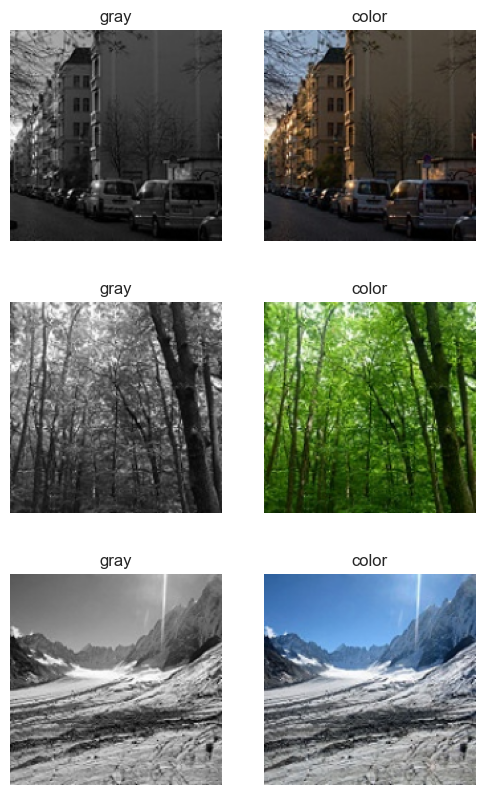

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 10))
for i in range(0,6,2):
  ax = plt.subplot(3, 2, i + 1)
  plt.imshow(cv2.cvtColor(gray[i].astype('uint8'), cv2.COLOR_BGR2RGB))
  plt.title("gray")
  plt.axis("off")
  ax = plt.subplot(3, 2, i + 2)
  plt.imshow(color[i].astype('uint8'))
  plt.title("color")
  plt.axis("off")

In [28]:
color.shape,gray.shape

((1000, 160, 160, 3), (1000, 160, 160, 1))

In [29]:
color /= 255
gray /= 255

In [30]:
def Colorizer(input_shape):
  encoder_input = keras.Input(shape=input_shape)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(encoder_input)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=1)(x)   
  x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
  x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(256, (5, 5), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)(x)
    
  encoder_output =  layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1)(x)

  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(encoder_output)
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1)(x)
  x = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', strides=1)(x)
  decoder_output = layers.UpSampling2D((2, 2))(x)
  return keras.Model(encoder_input, decoder_output, name="decoder")

colorizer = Colorizer((160,160,1))

In [31]:
colorizer.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 160, 160, 64)      640       
                                                                 
 conv2d_25 (Conv2D)          (None, 80, 80, 64)        36928     
                                                                 
 conv2d_26 (Conv2D)          (None, 80, 80, 128)       73856     
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 40, 128)       147584    
                                                                 
 conv2d_28 (Conv2D)          (None, 40, 40, 256)       295168    
                                                                 
 conv2d_29 (Conv2D)          (None, 40, 40, 256)       1638

In [32]:
def loss(y_true,y_pred) :
    l = tf.sqrt(tf.reduce_mean(tf.square(tf.abs(y_true - y_pred))))
    return l

In [33]:
# earlystopping = keras.callbacks.EarlyStopping(
#     monitor="accuracy",
#     patience=3, 
# )
colorizer.compile(loss=loss, optimizer='adam', metrics=['accuracy','mae','mse'])

In [36]:
# hist = colorizer.fit(gray[:4000], color[:4000],batch_size=32,epochs=100, callbacks = [earlystopping], validation_data = (gray[4001:5000], color[4001:5000]))
# hist = colorizer.fit(gray[:6000], color[:6000],batch_size=32,epochs=35,validation_data = (gray[6000:7000], color[6000:7000]))
hist = colorizer.fit(gray[:1000], color[:1000], batch_size=32, epochs=35, validation_data=(gray[800:1000], color[800:1000]))


Epoch 1/35
32/32 [==============================] - 251s 8s/step - loss: 0.1394 - accuracy: 0.4022 - mae: 0.1025 - mse: 0.0195 - val_loss: 0.1294 - val_accuracy: 0.3934 - val_mae: 0.0948 - val_mse: 0.0168
Epoch 2/35
32/32 [==============================] - 235s 7s/step - loss: 0.1312 - accuracy: 0.3956 - mae: 0.0953 - mse: 0.0173 - val_loss: 0.1261 - val_accuracy: 0.3912 - val_mae: 0.0914 - val_mse: 0.0159
Epoch 3/35
32/32 [==============================] - 224s 7s/step - loss: 0.1256 - accuracy: 0.4287 - mae: 0.0903 - mse: 0.0158 - val_loss: 0.1393 - val_accuracy: 0.4056 - val_mae: 0.1011 - val_mse: 0.0195
Epoch 4/35
32/32 [==============================] - 223s 7s/step - loss: 0.1272 - accuracy: 0.4243 - mae: 0.0923 - mse: 0.0162 - val_loss: 0.1172 - val_accuracy: 0.4595 - val_mae: 0.0836 - val_mse: 0.0138
Epoch 5/35
32/32 [==============================] - 223s 7s/step - loss: 0.1208 - accuracy: 0.4443 - mae: 0.0865 - mse: 0.0146 - val_loss: 0.1143 - val_accuracy: 0.4489 - val_mae: 

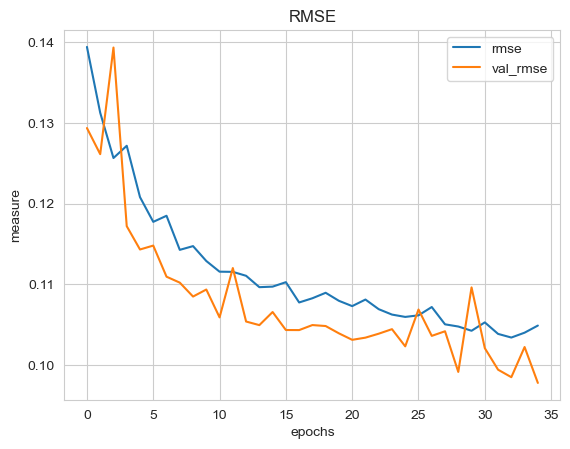

In [37]:
ax = plt.subplot(label= True)
plt.plot(hist.history["loss"], label = "rmse")
plt.plot(hist.history["val_loss"], label = "val_rmse")
plt.ylabel('measure')
plt.xlabel('epochs')
plt.title('RMSE')
plt.legend(["rmse", "val_rmse"])


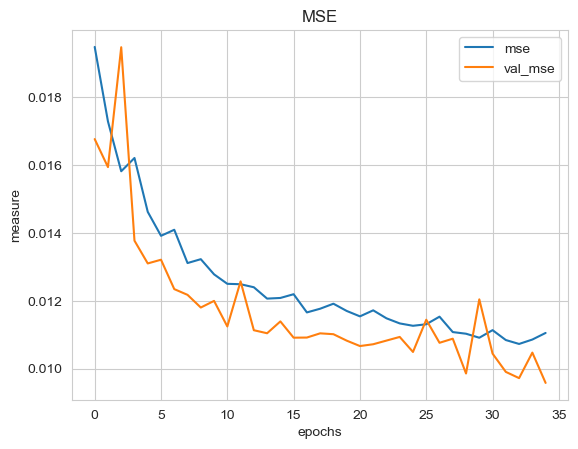

In [38]:
ax = plt.subplot(label= True)
plt.plot(hist.history["mse"], label = "mse")
plt.plot(hist.history["val_mse"], label = "val_mse")
plt.ylabel('measure')
plt.xlabel('epochs')
plt.title('MSE')
plt.legend(["mse", "val_mse"])

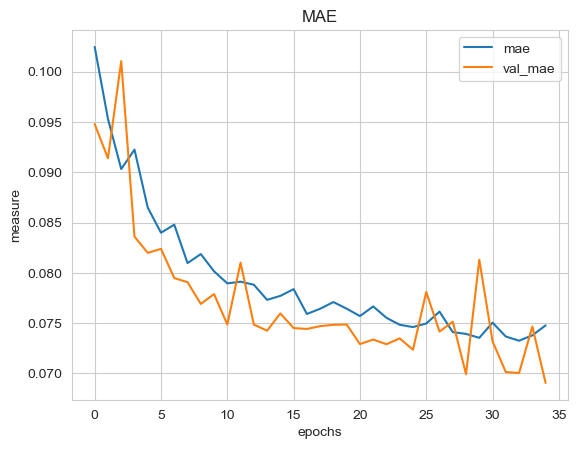

In [39]:
ax = plt.subplot(label= True)
plt.plot(hist.history["mae"], label = "mae")
plt.plot(hist.history["val_mae"], label = "val_mae")
plt.ylabel('measure')
plt.xlabel('epochs')
plt.title('MAE')
plt.legend(["mae", "val_mae"])

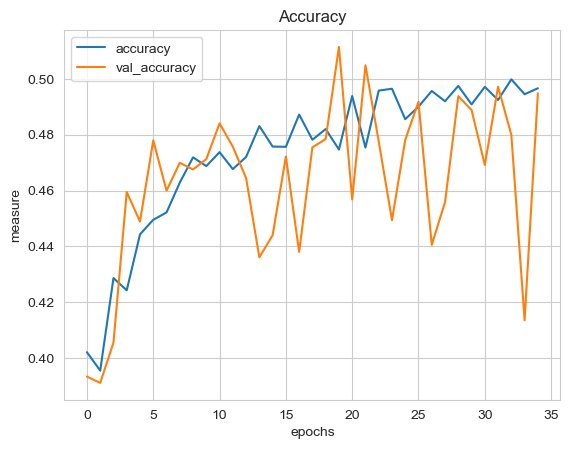

In [40]:
ax = plt.subplot(label= True)
plt.plot(hist.history["accuracy"], label = "accuracy")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy")
plt.ylabel('measure')
plt.xlabel('epochs')
plt.title('Accuracy')
plt.legend(["accuracy", "val_accuracy"])

In [41]:
colorized_deneme = colorizer.predict(gray[0:500])

16/16 [==============================] - 32s 2s/step


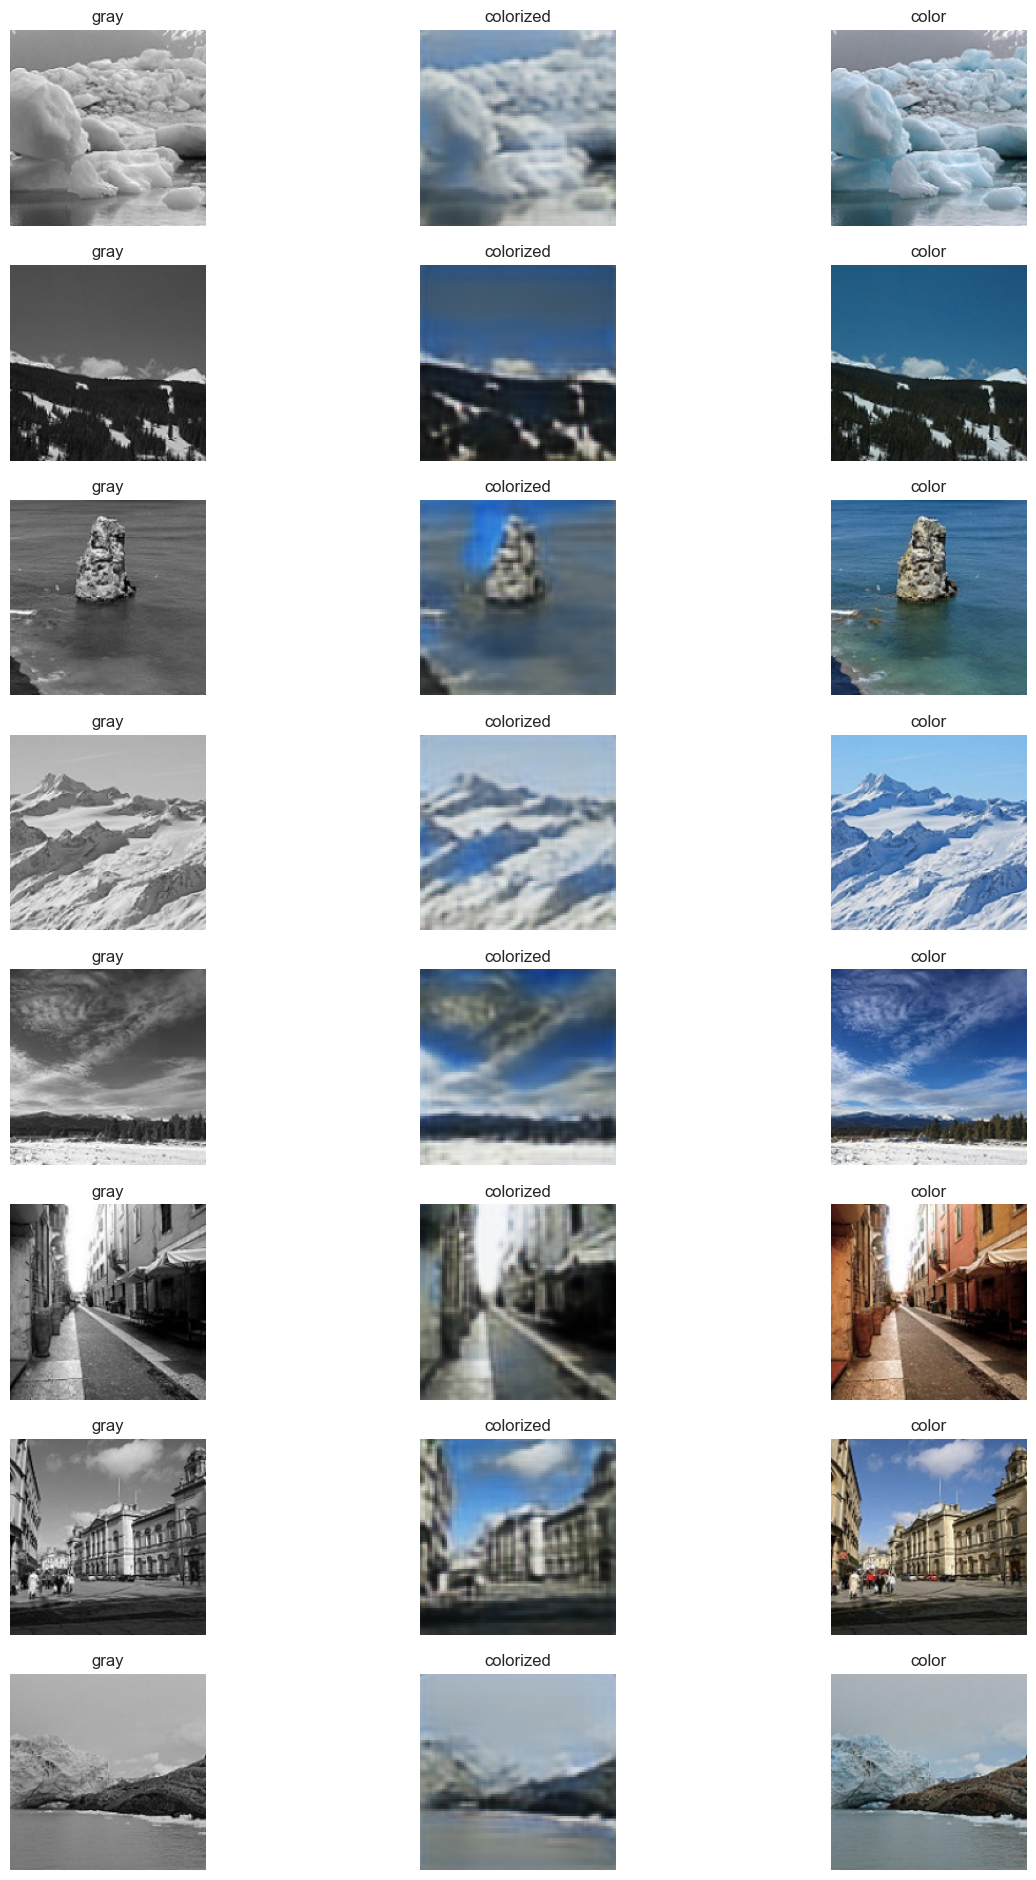

In [42]:
plt.figure(figsize=(15,30))
for i in range(6,30,3):
  ax = plt.subplot(10, 3, i + 1)
  plt.imshow(cv2.cvtColor(gray[0+i].astype("float32"), cv2.COLOR_BGR2RGB))
  plt.title("gray")
  plt.axis('off')
  ax = plt.subplot(10, 3, i + 2)
  plt.imshow(colorized_deneme[i])
  plt.title("colorized")
  plt.axis('off')
  ax = plt.subplot(10, 3, i + 3)
  plt.imshow(color[0+i])
  plt.title("color")
  plt.axis('off')

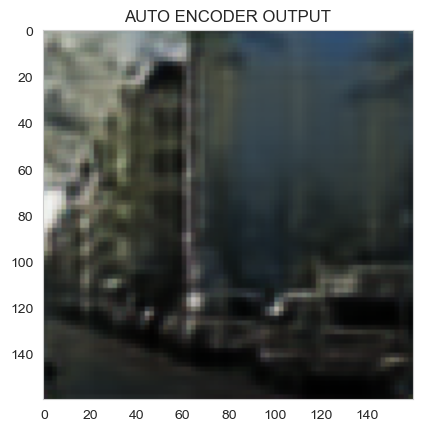

In [46]:
# plt.figure(figsize=(3,3))
plt.imshow(colorized_deneme[0])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)


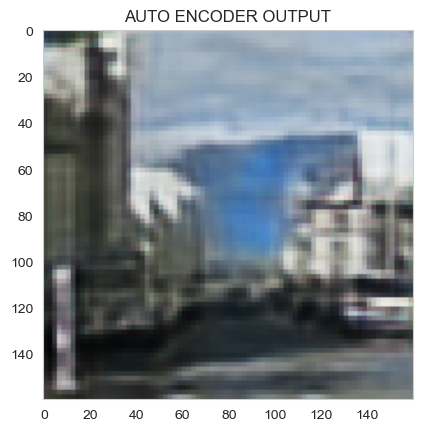

In [53]:
plt.imshow(colorized_deneme[5])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

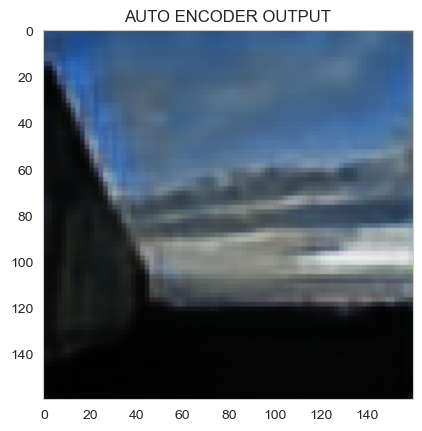

In [48]:
plt.imshow(colorized_deneme[320])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

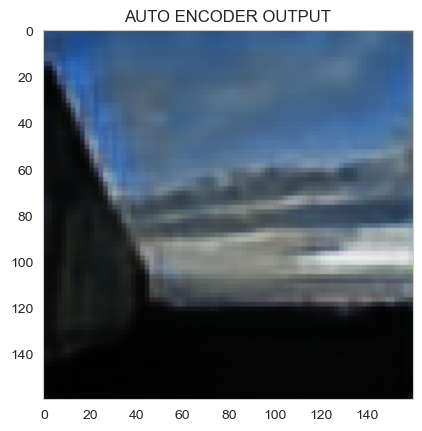

In [52]:

plt.imshow(colorized_deneme[320])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)

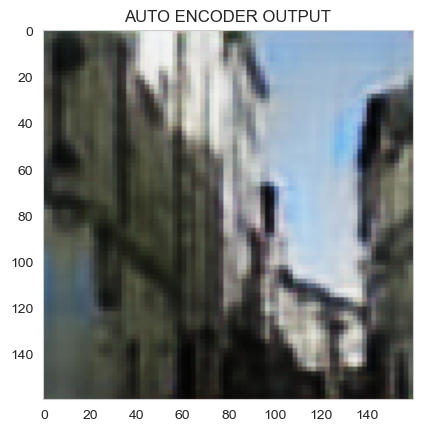

In [51]:
plt.imshow(colorized_deneme[499])
plt.title("AUTO ENCODER OUTPUT")
plt.grid(False)